# E-Commerce Market Analsis of Wish.com

Link to my Viz https://public.tableau.com/app/profile/minal6896/viz/Wishbook/Story1?publish=yes


## Web Scrapping- Info about Wish Website

In [1]:

from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd
from bs4 import BeautifulSoup
import requests
 
# get URL
page = requests.get("https://en.wikipedia.org/wiki/Wish_(platform)")
 
# scrape webpage
soup = BeautifulSoup(page.content, 'html.parser')

app = []
details = []

num_iter = len(soup.select('th'))

for i in range(num_iter):
        app.append(soup.select('th')[i].get_text())
        details.append(soup.select('td')[i+1].get_text())

# each list becomes a column
app_d = pd.DataFrame({"WishApp Information":app,
                       "Details":details,
                      })
app_d.head(10)

,WishApp Information,Details
0,Type of business,E-commerce
1,Type of site,Public
2,Available in,English and other languages
3,Founded,"July 4, 2010; 11 years ago (2010-07-04)"
4,Headquarters,"San Francisco, U.S."
5,Area served,Worldwide
6,Founder(s),Piotr Szulczewski Sheng Zhang
7,Key people,"Piotr Szulczewski, Chairman/CEO"
8,Industry,Online shopping
9,Revenue,$1.9 Billion


## Data Cleaning and EDA

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading Data
data = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
#Importing CSV of unique categories
unique_cat = pd.read_csv('unique-categories.sorted-by-count.csv')
unique_cat.head()

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


In [5]:
unique_cat_results = unique_cat.groupby('keyword')['count'].mean().sort_values(ascending=False)
unique_cat_results.head(10)

keyword
Summer             1321
Women's Fashion    1315
Fashion            1082
Women               961
Casual              905
Plus Size           636
sleeveless          580
Dress               549
Shorts              540
Tops                507
Name: count, dtype: int64

In [6]:
display(data.info())
# To check Null Value Count
display(data.isnull().any().to_frame())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

None

,0
title,False
title_orig,False
price,False
retail_price,False
currency_buyer,False
units_sold,False
uses_ad_boosts,False
rating,False
rating_count,False
rating_five_count,True


In [7]:
#Dealing with Null values of Rating
# Replacing Null Values
data['rating_five_count'] = data['rating_five_count'].replace(np.nan, 0)
data['rating_four_count'] = data['rating_four_count'].replace(np.nan, 0)
data['rating_three_count'] = data['rating_three_count'].replace(np.nan, 0)
data['rating_two_count'] = data['rating_two_count'].replace(np.nan, 0)
data['rating_one_count'] = data['rating_one_count'].replace(np.nan, 0)

In [8]:
data['product_color'].value_counts().iloc[:5].to_frame()

,product_color
black,302
white,254
yellow,105
pink,99
blue,99


In [9]:
# Replacing Null and duplicates of product colour
data['product_color'] = data['product_color'].replace('White', 'white')
data['product_color'] = data['product_color'].replace('Black', 'black')
data['product_color'] = data['product_color'].replace('coolblack', 'black')

data['product_color'] = data['product_color'].replace('navyblue', 'blue')
data['product_color'] = data['product_color'].replace('lightblue', 'blue')
data['product_color'] = data['product_color'].replace('skyblue', 'blue')
data['product_color'] = data['product_color'].replace('darkblue', 'blue')
data['product_color'] = data['product_color'].replace('navy', 'blue')
data['product_color'] = data['product_color'].replace('lakeblue', 'blue')
data['product_color'] = data['product_color'].replace('purple', 'blue')
data['product_color'] = data['product_color'].replace('navy blue', 'blue')

data['product_color'] = data['product_color'].replace('winered', 'red')
data['product_color'] = data['product_color'].replace('rosered', 'red')
data['product_color'] = data['product_color'].replace('rose', 'red')
data['product_color'] = data['product_color'].replace('orange-red', 'red')
data['product_color'] = data['product_color'].replace('burgundy', 'red')
data['product_color'] = data['product_color'].replace('lightred', 'red')
data['product_color'] = data['product_color'].replace('coralred', 'red')
data['product_color'] = data['product_color'].replace('wine', 'red')
data['product_color'] = data['product_color'].replace('watermelonred', 'red')

data['product_color'] = data['product_color'].replace('lightpink', 'pink')
data['product_color'] = data['product_color'].replace('beige', 'pink')
data['product_color'] = data['product_color'].replace('camel', 'pink')
data['product_color'] = data['product_color'].replace('apricot', 'pink')
data['product_color'] = data['product_color'].replace('Pink', 'pink')
data['product_color'] = data['product_color'].replace('dustypink', 'pink')

data['product_color'] = data['product_color'].replace('armygreen', 'green')
data['product_color'] = data['product_color'].replace('army green', 'green')
data['product_color'] = data['product_color'].replace('Army green', 'green')
data['product_color'] = data['product_color'].replace('lightgreen', 'green')
data['product_color'] = data['product_color'].replace('fluorescentgreen', 'green')
data['product_color'] = data['product_color'].replace('mintgreen', 'green')
data['product_color'] = data['product_color'].replace('khaki', 'green')
data['product_color'] = data['product_color'].replace('applegreen', 'green')

data['product_color'] = data['product_color'].replace('gray', 'grey')
data['product_color'] = data['product_color'].replace('silver', 'grey')
data['product_color'] = data['product_color'].replace('lightgray', 'grey')
data['product_color'] = data['product_color'].replace('lightgrey', 'grey')

data['product_color'] = data['product_color'].replace('lightyellow', 'yellow')

data['product_color'] = data['product_color'].replace('coffee', 'brown')

data['product_color'] = data['product_color'].replace('white & green', 'dual')
data['product_color'] = data['product_color'].replace('black & green', 'dual')
data['product_color'] = data['product_color'].replace('black & white', 'dual')
data['product_color'] = data['product_color'].replace('pink & grey', 'dual')
data['product_color'] = data['product_color'].replace('pink & white', 'dual')
data['product_color'] = data['product_color'].replace('black & blue', 'dual')
data['product_color'] = data['product_color'].replace('white & black', 'dual')
data['product_color'] = data['product_color'].replace('black & yellow', 'dual')
data['product_color'] = data['product_color'].replace('pink & blue', 'dual')
data['product_color'] = data['product_color'].replace('pink & black', 'dual')
data['product_color'] = data['product_color'].replace('blackwhite', 'dual')

data['product_color'] = data['product_color'].replace('multicolor', 'other')
data['product_color'] = data['product_color'].replace('floral', 'other')
data['product_color'] = data['product_color'].replace('whitefloral', 'other')
data['product_color'] = data['product_color'].replace('leopard', 'other')
data['product_color'] = data['product_color'].replace('camouflage', 'other')
data['product_color'] = data['product_color'].replace('rainbow', 'other')
data['product_color'] = data['product_color'].replace(np.nan, 'other')

In [10]:
#data.isnull().any().to_frame()

In [11]:
data['product_variation_size_id'].value_counts()
#product_color[product_color >1].to_frame()

S                               641
XS                              356
M                               200
XXS                             100
L                                49
                               ... 
100 x 100cm(39.3 x 39.3inch)      1
5PAIRS                            1
daughter 24M                      1
choose a size                     1
26(Waist 72cm 28inch)             1
Name: product_variation_size_id, Length: 106, dtype: int64

In [12]:
# Replacing duplicates of product size
data['product_variation_size_id'] = data['product_variation_size_id'].replace('S.', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size S.', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('s', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('size S', 'S')

data['product_variation_size_id'] = data['product_variation_size_id'].replace('XS.', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-XS', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SIZE XS', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size -XXS', 'XXS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SIZE-XXS', 'XXS')

data['product_variation_size_id'] = data['product_variation_size_id'].replace('M.', 'M')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size M', 'M')

data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size4XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SizeL', 'L')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('5XL', 'XXXXXL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('4XL', 'XXXXL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('3XL', 'XXXL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('2XL', 'XXL')


In [13]:
product_color = data['product_variation_size_id'].value_counts()
product_color[product_color >1].to_frame()

,product_variation_size_id
S,676
XS,369
M,206
XXS,104
L,52
XL,19
XXL,19
XXXXL,7
XXXS,6
XXXXXL,4


In [14]:
def df_SId(name):
    if name == 'S' \
    or name == 'XS' \
    or name == 'XXS' \
    or name == 'XXXS' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL' :
        return name
    else:
        return 'OTHER'

data['product_variation_size_id'] = data['product_variation_size_id'].replace(np.nan,'OTHER')
data['product_variation_size_id'] = data['product_variation_size_id'].apply(df_SId)
    

In [15]:
data['product_variation_size_id'].value_counts().to_frame()

,product_variation_size_id
S,676
XS,369
M,206
OTHER,108
XXS,104
L,52
XL,19
XXL,19
XXXXL,7
XXXS,6


In [16]:
# Replacing Null Values of Urgency Banner
data['has_urgency_banner'] = data['has_urgency_banner'].replace(np.nan,0)
data = data.drop(['urgency_text'], axis=1)

In [17]:
data['origin_country'].value_counts().to_frame() #Checking values in Country

,origin_country
CN,1516
US,31
VE,5
SG,2
GB,1
AT,1


In [18]:
# Replacing by frequency

data['origin_country'] = data['origin_country'].replace(np.nan, 'CN')

In [19]:
data['merchant_profile_picture'].describe().to_frame() #Checking values of merchant 

,merchant_profile_picture
count,226
unique,125
top,https://s3-us-west-1.amazonaws.com/sweeper-pro...
freq,12


In [20]:
#Dealing Nans of Merchant details like name,info subtitle and profile picture
data['merchant_name'] = data['merchant_name'].replace(np.nan, 'no name avilable')
data['merchant_info_subtitle'] = data['merchant_info_subtitle'].replace(np.nan, 'no information')
data['merchant_profile_picture'] = data['merchant_profile_picture'].replace(np.nan, 'no profile picture')

In [21]:
data.isnull().any().to_frame() #Removed all Nulss

,0
title,False
title_orig,False
price,False
retail_price,False
currency_buyer,False
units_sold,False
uses_ad_boosts,False
rating,False
rating_count,False
rating_five_count,False


In [22]:
data['price_discount'] = data['retail_price'] - data['price']

## EDA

### product_color

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


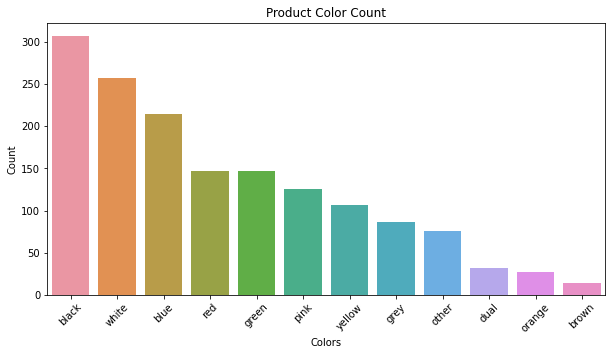

In [23]:
# Visualizing Product Color Count
plt.figure(figsize=(10,5))
sns.countplot('product_color', data = data, order = data['product_color'].value_counts().iloc[:12].index)
plt.xlabel('Colors')
plt.ylabel('Count')
plt.title('Product Color Count')
plt.xticks(rotation=45)
plt.show()

### Product Size

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


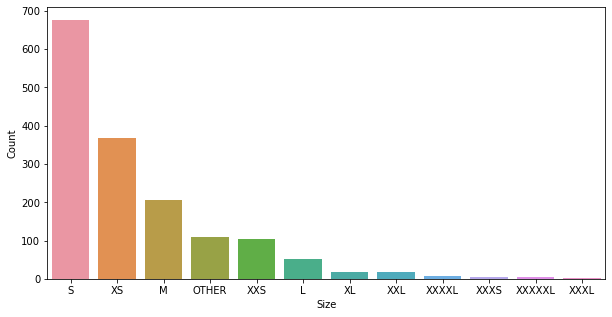

In [24]:
# Visualizing Product Size
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot('product_variation_size_id', data = data, order = data['product_variation_size_id'].value_counts().index, ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

### Urgency banner

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


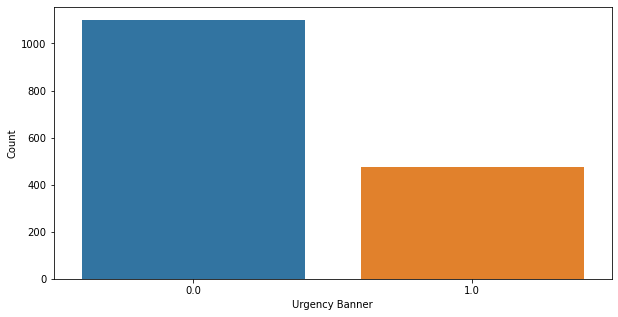

In [25]:
# Visualizing Urgency banner
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot('has_urgency_banner', data = data, ax=ax)
ax.set(xlabel='Urgency Banner', ylabel='Count')
plt.show()

### Country

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


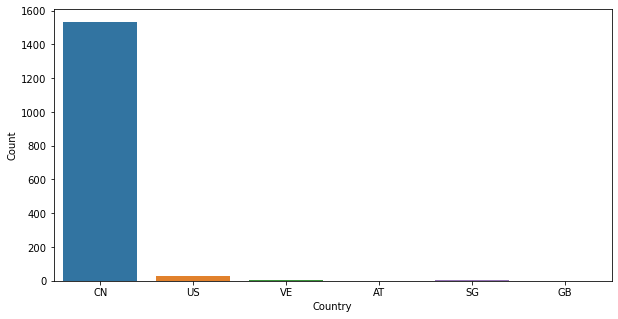

In [26]:
# Visualizing Country
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot('origin_country', data = data, ax=ax)
ax.set(xlabel='Country', ylabel='Count')
plt.show()

# Ad boost

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ad-boosts')

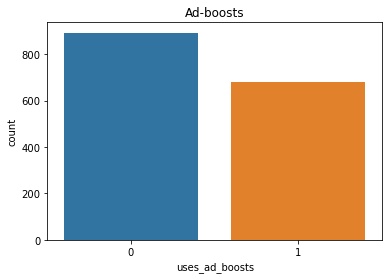

In [27]:
# Visualizing Ad boost
sns.countplot('uses_ad_boosts',data= data)
plt.title('Ad-boosts')

### Urgency

In [28]:
urgency = data[['has_urgency_banner','units_sold']]
urgency = urgency.replace(np.nan,0)

Text(0.5, 1.0, 'Urgency banner vs Sale')

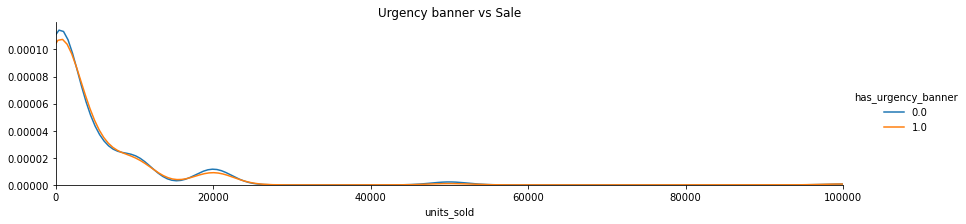

In [29]:
fig = sns.FacetGrid(urgency,hue='has_urgency_banner',aspect=4)

fig.map(sns.kdeplot,'units_sold')
x_max = urgency['units_sold'].max()
fig.set( xlim = (0,x_max))
fig.add_legend()
plt.title('Urgency banner vs Sale')

In [30]:
c = urgency['has_urgency_banner'].corr(urgency['units_sold'])
print(f'The correlation between the two is {c}')

The correlation between the two is -0.023891191736581052


Urgency banner is present doesn't have much impact on Units sold.


### Product inventory available

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation Inventory vs Sale')

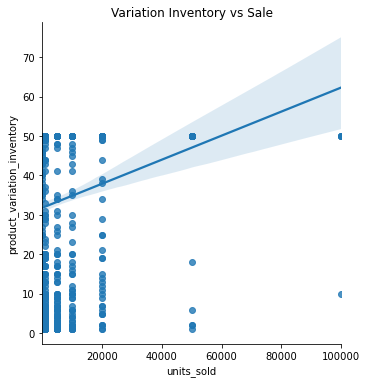

In [31]:
sns.lmplot('units_sold','product_variation_inventory',data=data)
plt.title('Variation Inventory vs Sale')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


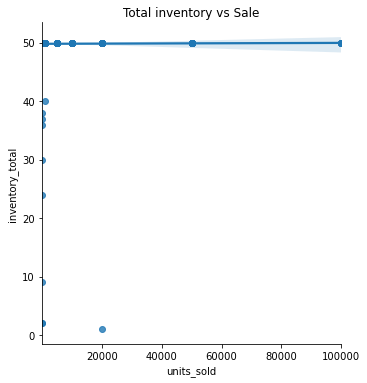

In [32]:
sns.lmplot('units_sold','inventory_total',data=data)
plt.title('Total inventory vs Sale')
plt.savefig("output1.jpg") 

There is a positive relation between units_sold and product-variation inventory. lmplot implies, above 30 units, the sale shows a positive trend.And product sale take place substantially, whenever the inventory range is at 50 but no below.

### Shipping

Text(0.5, 1.0, 'Shipping Name???')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3626 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3591 missing from current

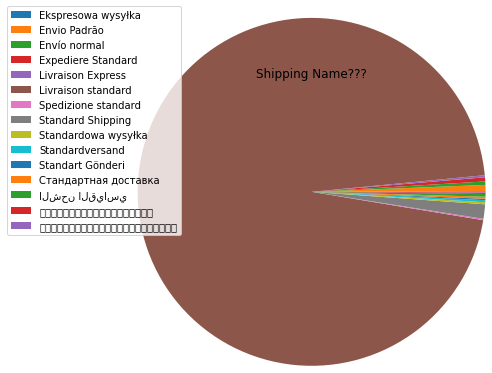

In [33]:
ship = data.groupby('shipping_option_name')['shipping_option_name'].count()
plt.pie(ship,radius=2)
plt.legend(ship.index,loc=(-0.9,0.3))
plt.title('Shipping Name???')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Shipping Price')

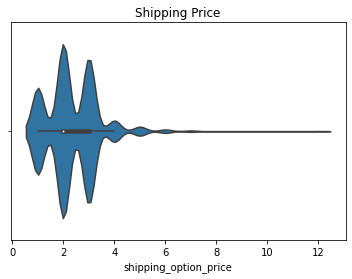

In [34]:
sns.violinplot('shipping_option_price',data=data)
plt.title('Shipping Price')

Text(0.5, 1.0, 'Shipping price vs Sale')

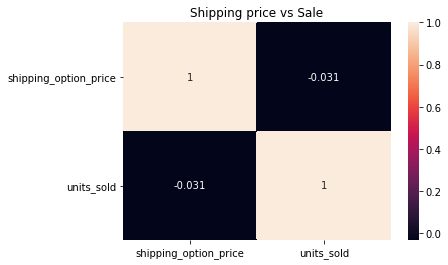

In [35]:
ship_price = data[['shipping_option_price','units_sold']]
sns.heatmap(ship_price.corr(),annot=True)
plt.title('Shipping price vs Sale')

We can see a range of price, where it is most preferred. Let's look if any relation exists btw Shipping price and Units sold.

### Merchant Details¶

In [36]:
merchant = data[['origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture','units_sold']]

In [37]:
merchant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   origin_country                1573 non-null   object 
 1   merchant_title                1573 non-null   object 
 2   merchant_name                 1573 non-null   object 
 3   merchant_info_subtitle        1573 non-null   object 
 4   merchant_rating_count         1573 non-null   int64  
 5   merchant_rating               1573 non-null   float64
 6   merchant_id                   1573 non-null   object 
 7   merchant_has_profile_picture  1573 non-null   int64  
 8   merchant_profile_picture      1573 non-null   object 
 9   units_sold                    1573 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 123.0+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Origin Country')

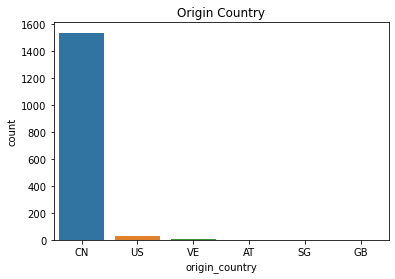

In [38]:
sns.countplot('origin_country',data=merchant)
plt.title('Origin Country')

Most of the sale originates from Chine(CN). CN seems to be the majority supplier of the products in website.

In [39]:
for i in ['merchant_name','merchant_info_subtitle']:
    y = merchant[i].isna()
    merchant[i] = y.apply(lambda x : 0 if x else 1)

<ipython-input-39-a0cc29536b97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant[i] = y.apply(lambda x : 0 if x else 1)


In [40]:
print('Correlation between "Merchant name" and "Units Sold:"')
print(merchant['merchant_name'].corr(merchant['units_sold']),end='\n\n')
print('Correlation between "merchant_info_subtitle" and "Units Sold":')
print(merchant['merchant_info_subtitle'].corr(merchant['units_sold']))

Correlation between "Merchant name" and "Units Sold:"
nan

Correlation between "merchant_info_subtitle" and "Units Sold":
nan


 'Merchant name' and 'merchant_info_subtitle' has very little impact but positive impact on Sales.

There a many outliers in the data. Let's do some cleaning. I am imputing mean values to the outliers.

In [41]:
merchant['merchant_rating_count'].describe().astype(int)

count       1573
mean       26495
std        78474
min            0
25%         1987
50%         7936
75%        24564
max      2174765
Name: merchant_rating_count, dtype: int32

In [42]:

#I am replacing all values above 24564 with mean value 26495.

<ipython-input-43-cd0ac81a296d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant['merchant_rating_count'] = merchant['merchant_rating_count'].apply(lambda x: mean if x>24564 else x)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating Count')

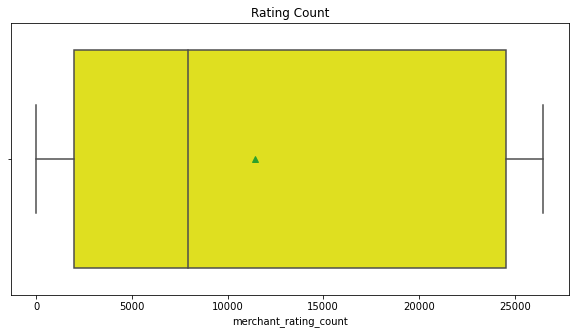

In [43]:
mean = merchant['merchant_rating_count'].mean()
merchant['merchant_rating_count'] = merchant['merchant_rating_count'].apply(lambda x: mean if x>24564 else x)
sns.boxplot(merchant['merchant_rating_count'],color='yellow',showmeans=True)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Rating Count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating')

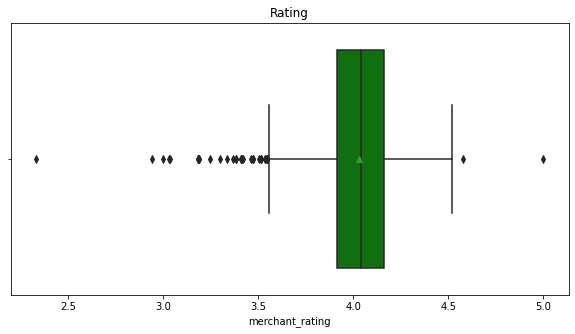

In [44]:
sns.boxplot(merchant['merchant_rating'],color='green',showmeans=True)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Rating')

Text(0.5, 1.0, 'Rating vs Sale')

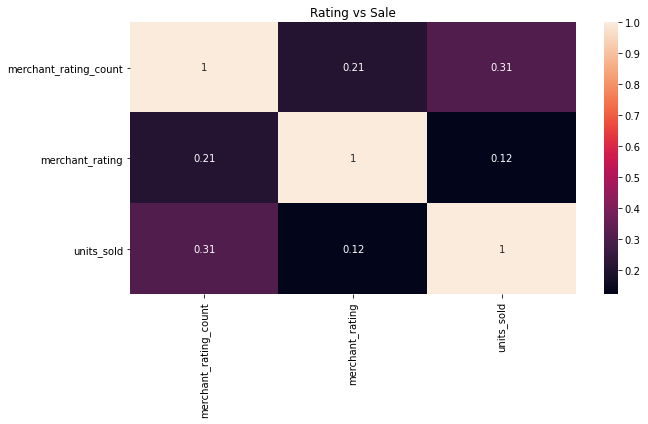

In [45]:
df1 = merchant[['merchant_rating_count','merchant_rating','units_sold']]
sns.heatmap(df1.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Rating vs Sale')

Figure implies that both rating count and rating are positively and heavily correlated to sale of a product

<ipython-input-46-e8d419f64a66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant['merchant_has_profile_picture'] = merchant['merchant_has_profile_picture'].apply(lambda x : 'yes' if x==1 else 'no')


Text(0.5, 1.0, 'Merchant Profile pic vs Sale')

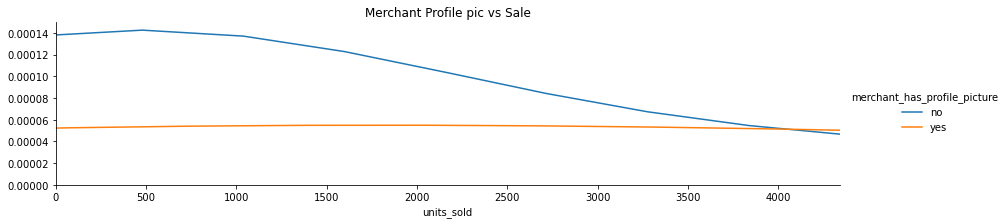

In [46]:
merchant['merchant_has_profile_picture'] = merchant['merchant_has_profile_picture'].apply(lambda x : 'yes' if x==1 else 'no')
fig = sns.FacetGrid(merchant,hue='merchant_has_profile_picture',aspect=4)

fig.map(sns.kdeplot,'units_sold')
x_max = urgency['units_sold'].mean() # Considering the Mean sales level
fig.set( xlim = (0,x_max))
fig.add_legend()
plt.title('Merchant Profile pic vs Sale')

### Rating

Text(0.5, 1.0, 'Rating vs Sale')

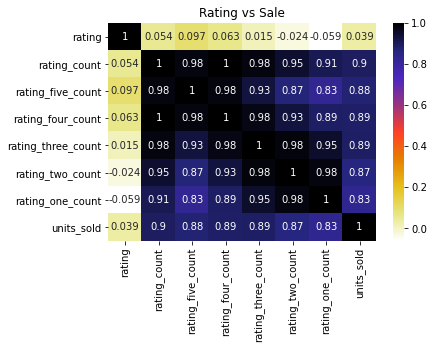

In [47]:
from pandas import DataFrame,Series
rating_df = DataFrame(data[['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count','units_sold']])
sns.heatmap(rating_df.corr(),cmap='CMRmap_r',annot=True)
plt.title('Rating vs Sale')

Lower the rating, lower the number of units sold
higher the number of times a product is rated, more the number of product sal


### Tags 

In [48]:
from wordcloud import WordCloud

tags_for_count=[]

for x in data['tags']:
    for word in str(x).split(sep=','):
        word=word.lower()
        tags_for_count.append(word)
tags_for_count 

['summer',
 'fashion',
 'womenunderwearsuit',
 'printedpajamasset',
 'womencasualshort',
 "women's fashion",
 'flamingo',
 'loungewearset',
 'casual',
 'shirt',
 'casualsleepwear',
 'shorts',
 'flamingotshirt',
 'elastic',
 'vintage',
 'tops',
 'tshirtandshortsset',
 'women',
 'sleepwear',
 'print',
 'womenpajamasset',
 'womennightwear',
 'pajamas',
 'womensleepwearset',
 'mini',
 'womens dresses',
 'summer',
 'patchwork',
 'fashion dress',
 'dress',
 'mini dress',
 "women's fashion",
 'women s clothing',
 'backless',
 'party',
 'summer dresses',
 'sleeveless',
 'sexy',
 'casual',
 'summer',
 'cardigan',
 'women beachwear',
 'chiffon',
 'sexy women',
 'coat',
 'summercardigan',
 'openfront',
 'short sleeves',
 'swimsuit',
 "women's fashion",
 'leaf',
 'green',
 'printed',
 'spring',
 'longcardigan',
 'women',
 'beach',
 'kimono',
 'summer',
 'shorts',
 'cotton',
 'cotton t shirt',
 'sleeve',
 'printedletterstop',
 'clothing',
 'tops',
 'necks',
 'short sleeves',
 "women's fashion",
 'w

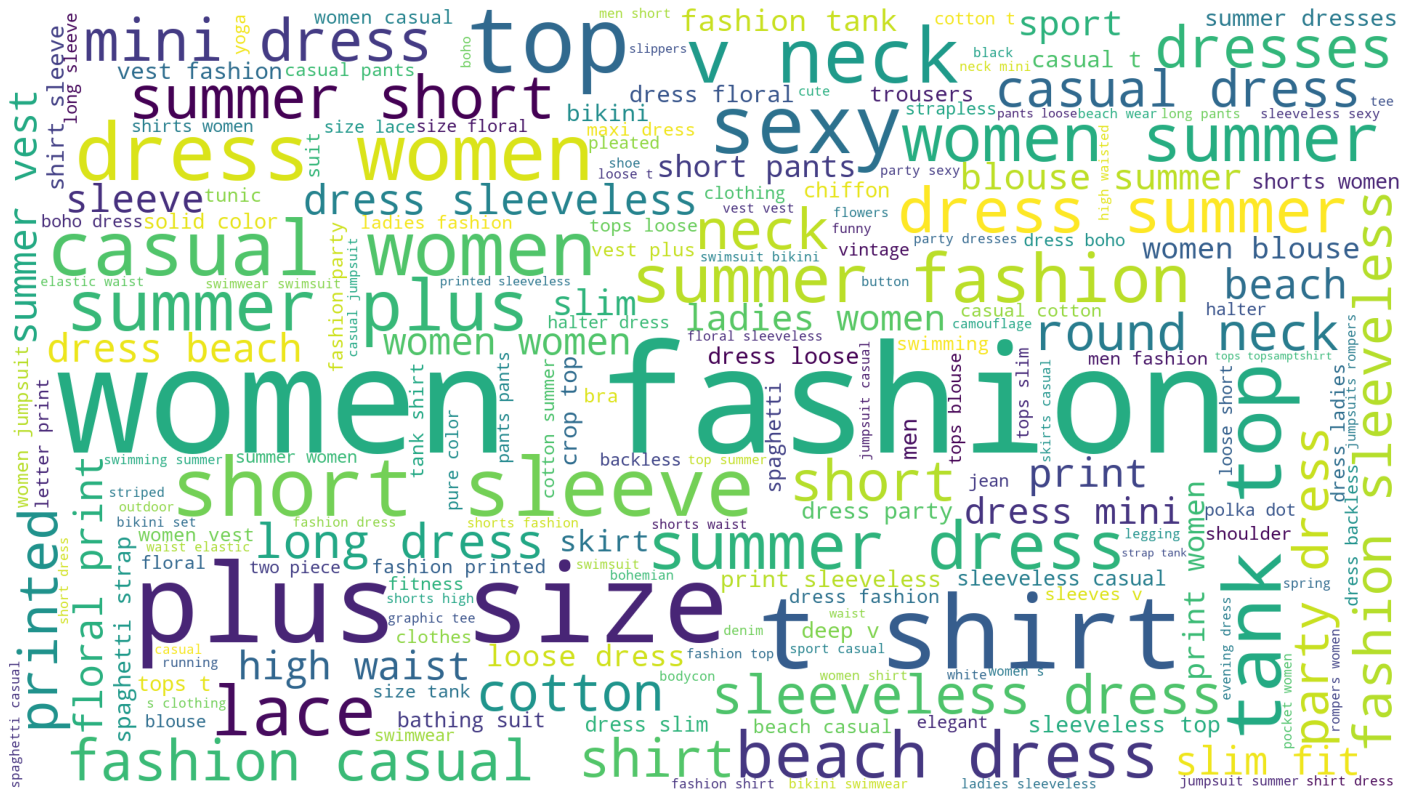

In [49]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(tags_for_count))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the words clouds,  most frequent words the merchants put in tags are "women", "fashion", "plus", "size", "sexy" and "shirt"

In [50]:
data['crawl_month'].value_counts()

2020-08    1573
Name: crawl_month, dtype: int64

In [51]:
#Check and deal with NaN values.
data.isna().sum()
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,title,0.0
1,title_orig,0.0
2,price,0.0
3,retail_price,0.0
4,currency_buyer,0.0
5,units_sold,0.0
6,uses_ad_boosts,0.0
7,rating,0.0
8,rating_count,0.0
9,rating_five_count,0.0


### Exploring correlation for Categorical Variables

In [52]:
# Creating a pivot table for product color and origin country
data_c= data[['product_color','origin_country','units_sold']]

data_c= data_c.groupby(['origin_country','product_color'],as_index=False).mean()

grouped_pivot_c = data_c.pivot(index='origin_country',columns='product_color')
grouped_pivot_c

units_sold                                        \
product_color        Blue     RED Rose red    army        black   
origin_country                                                    
AT                    NaN     NaN      NaN     NaN          NaN   
CN                10000.0  1000.0    100.0  1000.0  5340.111111   
GB                    NaN     NaN      NaN     NaN          NaN   
SG                    NaN     NaN      NaN     NaN          NaN   
US                    NaN     NaN      NaN     NaN  2900.000000   
VE                    NaN     NaN      NaN     NaN   100.000000   

                                                                               \
product_color  black & stripe         blue blue & pink   brown brown & yellow   
origin_country                                                                  
AT                        NaN          NaN         NaN     NaN            NaN   
CN                     5000.0  4194.283019      5000.0  2275.0          100.0   
GB                        NaN  1000.000000         NaN     NaN            NaN   
SG                        NaN   100.000000         NaN     NaN            NaN   
US                        NaN          NaN         NaN     NaN            NaN   
VE                        NaN          NaN         NaN     NaN            NaN   

                ...                                                           \
product_color   ... rosegold    star    tan  violet        white white & red   
origin_country  ...                                                            
AT              ...      NaN     NaN  100.0     NaN          NaN         NaN   
CN              ...  20000.0  5000.0    NaN  1000.0  4551.694444      5000.0   
GB              ...      NaN     NaN    NaN     NaN          NaN         NaN   
SG              ...      NaN     NaN    NaN     NaN          NaN         NaN   
US              ...      NaN     NaN    NaN     NaN   525.000000         NaN   
VE              ...      NaN     NaN    NaN     NaN    50.000000         NaN   

                                                                   
product_color  whitestripe wine red winered & yellow       yellow  
origin_country                                                     
AT                     NaN      NaN              NaN          NaN  
CN                 10000.0  50000.0           1000.0  2184.431373  
GB                     NaN      NaN              NaN          NaN  
SG                     NaN      NaN              NaN          NaN  
US                     NaN      NaN              NaN  1080.000000  
VE                     NaN      NaN              NaN          NaN  

[6 rows x 46 columns]

In [53]:
# Fill the NaN values with 0
grouped_pivot_c = grouped_pivot_c.fillna(0)
grouped_pivot_c

units_sold                                        \
product_color        Blue     RED Rose red    army        black   
origin_country                                                    
AT                    0.0     0.0      0.0     0.0     0.000000   
CN                10000.0  1000.0    100.0  1000.0  5340.111111   
GB                    0.0     0.0      0.0     0.0     0.000000   
SG                    0.0     0.0      0.0     0.0     0.000000   
US                    0.0     0.0      0.0     0.0  2900.000000   
VE                    0.0     0.0      0.0     0.0   100.000000   

                                                                               \
product_color  black & stripe         blue blue & pink   brown brown & yellow   
origin_country                                                                  
AT                        0.0     0.000000         0.0     0.0            0.0   
CN                     5000.0  4194.283019      5000.0  2275.0          100.0   
GB                        0.0  1000.000000         0.0     0.0            0.0   
SG                        0.0   100.000000         0.0     0.0            0.0   
US                        0.0     0.000000         0.0     0.0            0.0   
VE                        0.0     0.000000         0.0     0.0            0.0   

                ...                                                           \
product_color   ... rosegold    star    tan  violet        white white & red   
origin_country  ...                                                            
AT              ...      0.0     0.0  100.0     0.0     0.000000         0.0   
CN              ...  20000.0  5000.0    0.0  1000.0  4551.694444      5000.0   
GB              ...      0.0     0.0    0.0     0.0     0.000000         0.0   
SG              ...      0.0     0.0    0.0     0.0     0.000000         0.0   
US              ...      0.0     0.0    0.0     0.0   525.000000         0.0   
VE              ...      0.0     0.0    0.0     0.0    50.000000         0.0   

                                                                   
product_color  whitestripe wine red winered & yellow       yellow  
origin_country                                                     
AT                     0.0      0.0              0.0     0.000000  
CN                 10000.0  50000.0           1000.0  2184.431373  
GB                     0.0      0.0              0.0     0.000000  
SG                     0.0      0.0              0.0     0.000000  
US                     0.0      0.0              0.0  1080.000000  
VE                     0.0      0.0              0.0     0.000000  

[6 rows x 46 columns]

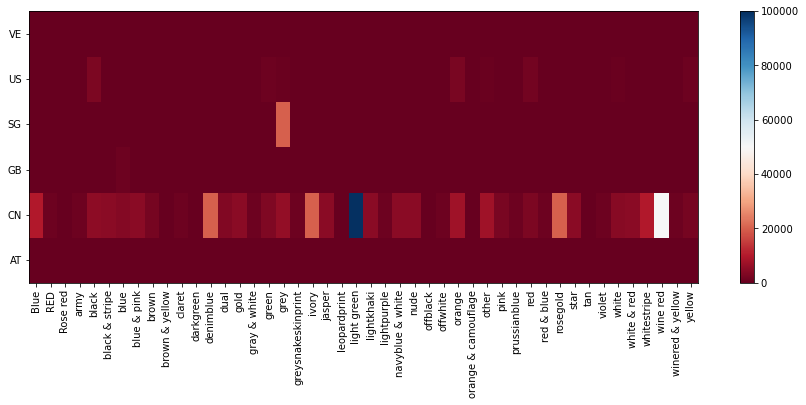

In [54]:
# Visualizing the pivot table
fig, ax = plt.subplots(figsize=(15,5))
im = ax.pcolor(grouped_pivot_c, cmap='RdBu')

#label names
row_labels = grouped_pivot_c.columns.levels[1]
col_labels = grouped_pivot_c.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot_c.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot_c.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [55]:
df_group_s = data[['product_variation_size_id','origin_country','units_sold']]

df_group_s = df_group_s.groupby(['origin_country','product_variation_size_id'],as_index=False).mean()

grouped_pivot_s = df_group_s.pivot(index='origin_country',columns='product_variation_size_id')
grouped_pivot_s

units_sold                                         \
product_variation_size_id            L            M        OTHER            S   
origin_country                                                                  
AT                                 NaN          NaN          NaN          NaN   
CN                         5849.096154  7172.269036  3225.447619  5128.998492   
GB                                 NaN          NaN          NaN          NaN   
SG                                 NaN          NaN          NaN          NaN   
US                                 NaN  1550.000000  3366.666667  1692.500000   
VE                                 NaN   100.000000          NaN   100.000000   

                                                                   \
product_variation_size_id           XL            XS          XXL   
origin_country                                                      
AT                                 NaN    100.000000          NaN   
CN                         7257.894737   2449.440111  2250.526316   
GB                                 NaN   1000.000000          NaN   
SG                                 NaN  10050.000000          NaN   
US                                 NaN    100.000000          NaN   
VE                                 NaN     50.000000          NaN   

                                                                         \
product_variation_size_id          XXS         XXXL   XXXS        XXXXL   
origin_country                                                            
AT                                 NaN          NaN    NaN          NaN   
CN                         1876.646465  5033.333333  250.0  1622.857143   
GB                                 NaN          NaN    NaN          NaN   
SG                                 NaN          NaN    NaN          NaN   
US                           90.000000          NaN    NaN          NaN   
VE                                 NaN          NaN    NaN          NaN   

                                   
product_variation_size_id  XXXXXL  
origin_country                     
AT                            NaN  
CN                         7525.0  
GB                            NaN  
SG                            NaN  
US                            NaN  
VE                            NaN

In [56]:
# Fill the NaN values with 0
grouped_pivot_s = grouped_pivot_s.fillna(0)
grouped_pivot_s

units_sold                                         \
product_variation_size_id            L            M        OTHER            S   
origin_country                                                                  
AT                            0.000000     0.000000     0.000000     0.000000   
CN                         5849.096154  7172.269036  3225.447619  5128.998492   
GB                            0.000000     0.000000     0.000000     0.000000   
SG                            0.000000     0.000000     0.000000     0.000000   
US                            0.000000  1550.000000  3366.666667  1692.500000   
VE                            0.000000   100.000000     0.000000   100.000000   

                                                                   \
product_variation_size_id           XL            XS          XXL   
origin_country                                                      
AT                            0.000000    100.000000     0.000000   
CN                         7257.894737   2449.440111  2250.526316   
GB                            0.000000   1000.000000     0.000000   
SG                            0.000000  10050.000000     0.000000   
US                            0.000000    100.000000     0.000000   
VE                            0.000000     50.000000     0.000000   

                                                                         \
product_variation_size_id          XXS         XXXL   XXXS        XXXXL   
origin_country                                                            
AT                            0.000000     0.000000    0.0     0.000000   
CN                         1876.646465  5033.333333  250.0  1622.857143   
GB                            0.000000     0.000000    0.0     0.000000   
SG                            0.000000     0.000000    0.0     0.000000   
US                           90.000000     0.000000    0.0     0.000000   
VE                            0.000000     0.000000    0.0     0.000000   

                                   
product_variation_size_id  XXXXXL  
origin_country                     
AT                            0.0  
CN                         7525.0  
GB                            0.0  
SG                            0.0  
US                            0.0  
VE                            0.0

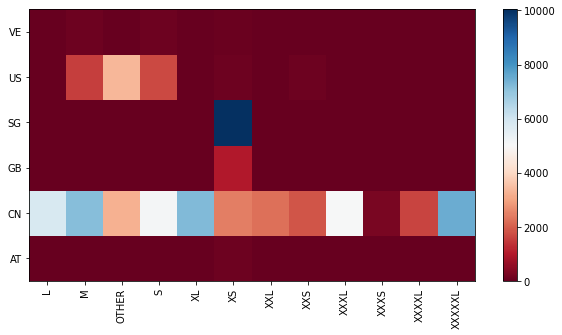

In [57]:
# Visualizing the pivot table
fig, ax = plt.subplots(figsize=(10,5))
im = ax.pcolor(grouped_pivot_s, cmap='RdBu')

#label names
row_labels = grouped_pivot_s.columns.levels[1]
col_labels = grouped_pivot_s.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot_s.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot_s.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Data Standardization and normalization

In [58]:
# As most of the customers are from CN so converting the price into CNY

data['price'] = data['price'] *7.97
data['retail_price'] = data['retail_price'] *7.97
data['currency_buyer'] = data['currency_buyer'].replace('EUR', 'CNY')

In [59]:
data['price_discount'] = data['retail_price'] - data['price']

In [60]:
def add_tags(tags):
    lst_tag = tags.split(',')
    return len(lst_tag)
data['tags_count'] = data['tags'].apply(add_tags)

In [61]:
#data normalization
data[['rating','rating_one_count','rating_two_count','rating_three_count','rating_four_count','rating_five_count','rating_count']].head(10)

,rating,rating_one_count,rating_two_count,rating_three_count,rating_four_count,rating_five_count,rating_count
0,3.76,9.0,1.0,10.0,8.0,26.0,54
1,3.45,1077.0,644.0,1118.0,1027.0,2269.0,6135
2,3.57,3.0,0.0,2.0,4.0,5.0,14
3,4.03,36.0,42.0,87.0,119.0,295.0,579
4,3.10,6.0,2.0,2.0,4.0,6.0,20
5,5.00,0.0,0.0,0.0,0.0,1.0,1
6,3.84,757.0,490.0,971.0,1352.0,3172.0,6742
7,3.76,31.0,18.0,61.0,56.0,120.0,286
8,3.47,3.0,1.0,3.0,2.0,6.0,15
9,3.60,112.0,68.0,92.0,128.0,287.0,687


In [62]:
# Data Normalization of ratings
def ratings_nor(rate, counts) :
    if rate == 0:
        return 0
    else :
        return rate/counts
data['rating_one_count'] = data.apply(lambda x: ratings_nor(x.rating_one_count, x.rating_count), axis=1)
data['rating_two_count'] = data.apply(lambda x: ratings_nor(x.rating_two_count, x.rating_count), axis=1)
data['rating_three_count'] = data.apply(lambda x: ratings_nor(x.rating_three_count, x.rating_count), axis=1)
data['rating_four_count'] = data.apply(lambda x: ratings_nor(x.rating_four_count, x.rating_count), axis=1)
data['rating_five_count'] = data.apply(lambda x: ratings_nor(x.rating_five_count, x.rating_count), axis=1)

In [63]:
data[['rating_count','merchant_rating_count']].head(5)

,rating_count,merchant_rating_count
0,54,568
1,6135,17752
2,14,295
3,579,23832
4,20,14482


In [64]:
def merchant_ratings_nor(c_rating,m_rating):
    if c_rating == 0:
        return 0
    else:
        return c_rating/m_rating
data['merchant_rating_count'] = data.apply(lambda x: merchant_ratings_nor(x.rating_count, x.merchant_rating_count), axis=1)

In [65]:
def dis(d_price, r_price):
    if d_price==0:
        return 0
    else:
        return d_price/r_price
data['price_discount'] = data.apply(lambda x: dis(x.price_discount, x.retail_price),axis=1)

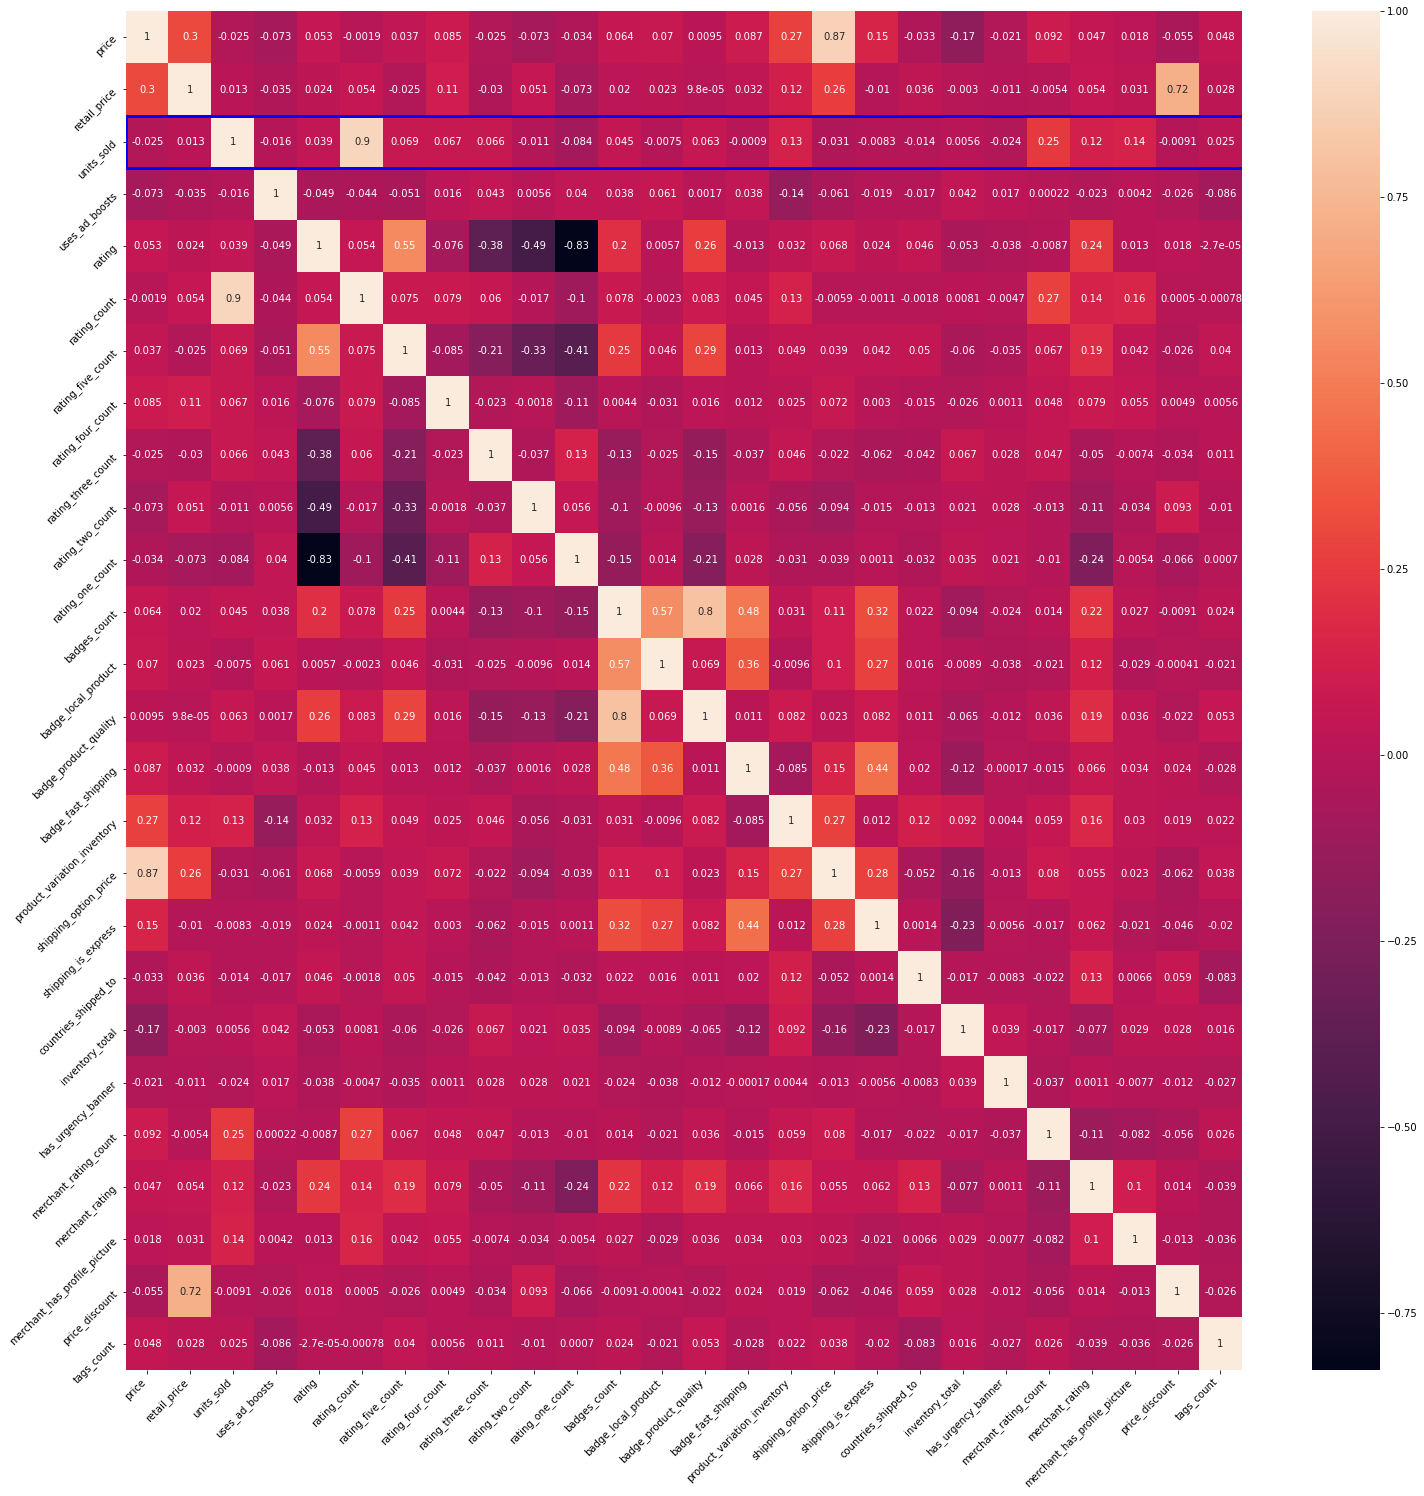

In [66]:
# Correlation Heat Map
fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(data.corr(), annot=True, ax=ax)
ax.add_patch(plt.Rectangle((0,2),31,1, fill = False, edgecolor = 'blue', lw = 3))

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

In [67]:
#dropping features with no or less corelation
data = data.drop(['currency_buyer','title','title_orig','tags','shipping_option_name'], axis=1)
data = data.drop(['merchant_title','merchant_name', 'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture'], axis = 1)
data = data.drop(['product_url','product_picture','product_id','crawl_month','theme'], axis=1)

In [68]:
#Converting categorical features for using in predictive modeling
color_dummy = pd.get_dummies(data['product_color'])
data = pd.concat([data, color_dummy], axis=1)

data.drop("product_color", axis = 1, inplace=True)
data.head()


,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,rosegold,star,tan,violet,white,white & red,whitestripe,wine red,winered & yellow,yellow
0,127.5200,111.58,100,0,3.76,54,0.481481,0.148148,0.185185,0.018519,...,0,0,0,0,1,0,0,0,0,0
1,63.7600,175.34,20000,1,3.45,6135,0.369845,0.167400,0.182233,0.104971,...,0,0,0,0,0,0,0,0,0,0
2,63.7600,342.71,100,0,3.57,14,0.357143,0.285714,0.142857,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,63.7600,63.76,5000,1,4.03,579,0.509499,0.205527,0.150259,0.072539,...,0,0,0,0,0,0,0,0,0,0
4,21.6784,23.91,100,1,3.10,20,0.300000,0.200000,0.100000,0.100000,...,0,0,0,0,0,0,0,0,0,1


In [69]:
size_dummy = pd.get_dummies(data['product_variation_size_id'])
data = pd.concat([data, size_dummy], axis=1)

data.drop("product_variation_size_id", axis = 1, inplace=True)
data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,OTHER,S,XL,XS,XXL,XXS,XXXL,XXXS,XXXXL,XXXXXL
0,127.5200,111.58,100,0,3.76,54,0.481481,0.148148,0.185185,0.018519,...,0,0,0,0,0,0,0,0,0,0
1,63.7600,175.34,20000,1,3.45,6135,0.369845,0.167400,0.182233,0.104971,...,0,0,0,1,0,0,0,0,0,0
2,63.7600,342.71,100,0,3.57,14,0.357143,0.285714,0.142857,0.000000,...,0,0,0,1,0,0,0,0,0,0
3,63.7600,63.76,5000,1,4.03,579,0.509499,0.205527,0.150259,0.072539,...,0,0,0,0,0,0,0,0,0,0
4,21.6784,23.91,100,1,3.10,20,0.300000,0.200000,0.100000,0.100000,...,0,1,0,0,0,0,0,0,0,0


In [70]:
country_dummy = pd.get_dummies(data['origin_country'])
data_ml = pd.concat([data, country_dummy], axis=1)

data.drop("origin_country", axis = 1, inplace=True)
data_ml.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,XXXL,XXXS,XXXXL,XXXXXL,AT,CN,GB,SG,US,VE
0,127.5200,111.58,100,0,3.76,54,0.481481,0.148148,0.185185,0.018519,...,0,0,0,0,0,1,0,0,0,0
1,63.7600,175.34,20000,1,3.45,6135,0.369845,0.167400,0.182233,0.104971,...,0,0,0,0,0,1,0,0,0,0
2,63.7600,342.71,100,0,3.57,14,0.357143,0.285714,0.142857,0.000000,...,0,0,0,0,0,1,0,0,0,0
3,63.7600,63.76,5000,1,4.03,579,0.509499,0.205527,0.150259,0.072539,...,0,0,0,0,0,1,0,0,0,0
4,21.6784,23.91,100,1,3.10,20,0.300000,0.200000,0.100000,0.100000,...,0,0,0,0,0,1,0,0,0,0


# K-Neighbors

In [71]:
from sklearn.model_selection import train_test_split

X = data.loc[:,data.columns !='units_sold']
y = data['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=66)

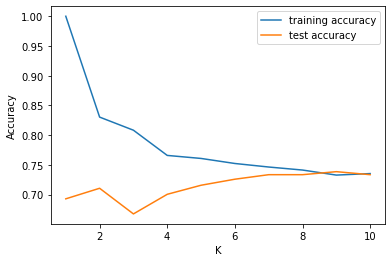

In [72]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# trying n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
# building the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
# training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
# test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.legend()

In [73]:
# Applying KNN with probably the best value of K i.e 9
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

print('Accuracy on training set {:.3f} '.format(knn.score(X_train,y_train)))
print('Accuracy on testing set {:.3f} '.format(knn.score(X_test,y_test)))

Accuracy on training set 0.733 
Accuracy on testing set 0.739 


### Conclusion

-80% of sale happens in 20% color and 6 sizes. 

-Downward trend in units sold as the price increases. 

-Successful products  have a mean rating above 3.5

-Among the top 50 merchants, the majority have number of ratings less than 250,000, mean ratings above 4.0 and have profile picture

-Although badges are poitive correlated with sales but it does not have  any kind of major badge affects on sales.

-The use of ad boosts does not seen to have any effect on the units sold and the site may lose revenue from this ads

-Bulk of shipping is done by one company. More than 90% sales don't prefer an express shipping. 



References-I have taken help from many sources other than lactures notes such as Kaggel, stackoverflow, Youtube and Google

# Thankyou